<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>


# Tarea  0 Machine-Learning- Introducción a Máquinas de aprendizaje

Daniel Tapia - 201573532-8

Jaime Zamorano - 201573520-4

5 de Octubre de 2018

<hr style="height:2px;border:none"/>

En esta tarea se trabajó con modelos lineales de aprendizaje y se aprendió acerca de ellos. La tarea se divide en las  secciones:
 
[2.](#segundo) Job Salary Prediction  
[3.](#tercero) Linear Regression by hand

<a id="segundo"></a>
## 2. Job Salary Prediction

En esta sección se trabajará con el problema de predecir el salario que ofrece un anuncio en internet a través unicamente del texto del anuncio. El dataset es ofrecido por *Adzuna* como una competencia en la plataforma más grande de *data science* Kaggle, a través del siguiente __[link](https://www.kaggle.com/c/job-salary-prediction)__. El objetivo de la competencia, según *Adzuna*, es el de tener un motor que pueda predecir el salario de cualquier anuncio de trabajo en Reunio Unido, para poder mejorar la experiencia de los usuarios que buscan trabajos, ya que así pueden filtrar sin que el mismo empleador señale explícitamente cuánto paga.

<img src="http://s5047.pcdn.co/wp-content/uploads/2013/05/salary-prediction-engine-v2.png" title="Title text" width="50%"/>

La métrica de evaluación de la competencia es MAE (*mean absolute error*):

$$
L = \frac{1}{N} \sum_i^N  \mid y_i - \hat{y}_i \mid
$$


Para descargar los datos a utilizar (*Train_rev1*) debe estar registrado en la plataforma de Kaggle. Se cuenta con cientos de miles registros con textos sin procesar, es decir, no están estructurados.


> a) Carge los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?  
```python
import pandas as pd
df = pd.read_csv("Train_rev1.csv")
df_train = df.iloc[:-10000]
df_val = df.iloc[-10000:]
...#load other sets
df.head()
```
*Recuerde que si no puede trabajar con todos los datos, debido a su volumen, puede muestrear*.


> b) Extraiga los datos de cada conjunto con los que trabajará, el *input* $X$, los textos, y el *output* $y$, los salarios.
```python
text = df.FullDescription
salary = df.SalaryNormalized
```

> c) Realice un pre-procesamiento a los datos brutos de texto para extraer características y generar la representación de los datos de entrada al modelo $\vec{x}$. Comente sobre lo realizado.

> d) Intente resolver el problema enfrentándolo como regresión con el modelo de regresión lineal ordinaria en *sklearn*. ¿Qué es lo que hace *fit_intercept=True*? Evalúe la función objetivo (F.O.) utilizada y la métrica de la competencia (*mean absolute error*) en ambos conjuntos generados en el punto a). Comente lo observado.
```python
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model.fit(X_train,y_train)
... #measure F.O.
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(y_train, model.predict(X_train)))
print("MAE on validation: ",mean_absolute_error(y_val, model.predict(X_val)))
```

> e) Intente mejorar sus resultados en base a la métrica de la competencia (MAE) sobre el conjunto de validación. Comente sobre lo realizado.  
*No se le pide que imite los resultados ganadores de la competencia (MAE de 3400), sino que mejore lo ya alcanzado siendo creativo.*
<div class="alert alert-warning"> HINT: Una opción es cambiar el *approach* de resolución desde regresión a casificación o trabajo sobre los datos (tal como limpiarlos).</div>


## A)

In [57]:
%%time
import pandas as pd
df = pd.read_csv("Train_rev1.csv") #se descarga el dataSet en cuestión
df_val = df.iloc[-10000:] #se toman los ultimos 10000 datos como datos de validación
df_train=df.iloc[:2400] #se toman los primeros 2400 datos como datos de entrenamiento



CPU times: user 4.84 s, sys: 344 ms, total: 5.18 s
Wall time: 5.19 s


In [5]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


Se ve que el dataSet en cuestión tiene 12 columnas:
* Item Id: identificador de dato.
* Title: título del trabajo
* FullDescription: Descripción del trabajo
* LocationRaw: Localización tal como esta en la página
* LocationNormalized: Localización normalizada a estandares.
* Contract Type: Tipo de contrato(muchos Nan Aquí)
* ContractTime: Tiempo de contrato
* Company: compañia
* Category: categoria
* SalaryRaw: Salario tal como aparece en la pagina(rangos y detalles)
* SalaryNormalized: Salarios pasados a números.
* Source: de donde viene la oferta.

Este dataset tiene aproximadamente 230000 datos, de las cuales se usaran 2400 para entranamiento y 10000 de validación.

In [6]:
df_train.SalaryNormalized.mean() #media de los salarios de entrenamiento

28839.907916666667

In [7]:
df_val.SalaryNormalized.mean() #media de los salarios de validación

34917.415

## B)

In [8]:
#extracción de variables a utilizar
texto_train = df_train.FullDescription
salario_train = df_train.SalaryNormalized
texto_val = df_val.FullDescription
salario_val = df_val.SalaryNormalized

In [9]:
df_val.shape
#dimensión de validación

(10000, 12)

In [10]:
df_train.shape
#dimensión de entrenamiento

(2400, 12)

## C)

In [11]:
#procesamiento de texto para laboratorio
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
    wordlemmatizer = WordNetLemmatizer()
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'(\/)+', r' ',text)#esta expresión regular quita los / de FullDescription
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words
#un ejemplo de como funciona el procesador de texto
word_extractor("Mathematical Modeller / Simulation Analyst Modeler / pono modeler")
#...

' mathemat model simul analyst model pono model'

Lo que se realizó en el preprocesamiento de arriba es dejar las palabras claves en los trabajos, omitiendo stop words. Esto se realizó para que el learner tuviera datos consistes, por ejemplo : si un trabajo requiere un "modeller" y otro un "model" entonces los dos seran tomados como model, relacionandolos. Tambien es importante notar que los datos no estaban en las mejores condiciones, uno de los problemas que se notaron es que los trabajos estaban separados con /, lo que era un problema para el procesador utilizado, por lo cual fue necesario usar expresiones regulares para borrar los / de las descripciones de trabajos.

In [12]:
%%time
#Procesamiento de los datos, advertencia: se puede tardar mucho si el input crece.
#Esta data tardó 1 minuto y 30 segundos aproximadamente en correr con 2400 datos de entrenamiento.
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
textos_train = [word_extractor(text) for text in df_train.FullDescription]
textos_val = [word_extractor(text) for text in df_val.FullDescription]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(textos_train))
features_train = vectorizer.transform(textos_train)
features_val = vectorizer.transform(textos_val)
labels_train = np.asarray(df_train.SalaryNormalized.astype(float))
labels_val = np.asarray(df_val.SalaryNormalized.astype(float))
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

CPU times: user 1min 28s, sys: 330 ms, total: 1min 29s
Wall time: 1min 29s


Aquí se procesan los datos para que estos puedan ser utilizados por el learner. Esto se hace para que el modelo lineal tenga el input correcto, una estructura indicando si la palabra i-esima está o no en la descripción(palabras extraidas con el procesador de palabras descrito dos códigos atras). Este proceso demora mucho, probablemente por la naturaleza del input, son muchas palabras las cuales se pueden entrelazar con otras, o tener palabras del tipo "98experiencie" que se pudieron haber tomado como una en el input. En otras palabras, existe el riesgo que todas las palabras de todos los datos hayan salido diferentes, generando overfitting, lo que que refleja mucho exito en los datos de entrenamiento, pero fracaso en los datos de validación.

## E)

In [13]:
#aplicando el modelo lineal, se puede ver los resultados MAE 
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model.fit(features_train,labels_train)
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(labels_train, model.predict(features_train)))
print("MAE on validation: ",mean_absolute_error(labels_val, model.predict(features_val)))

MAE on train:  97.21598004615554
MAE on validation:  18540.851090934426


Se ve que el error absoluto de entrenamiento es pequeño para los datos que se estan manejando. Sin embargo, el error de validación es grande. Esto puede deberse ya que hay un cierto grado de overfitting con los datos de entrenamiento.

In [62]:
df_val = df.iloc[-20000:] #se toman los ultimos 20000 datos como datos de validación
df_train=df.iloc[:1000] #se toman los primeros 1000 datos como datos de entrenamiento
textos_train = [word_extractor(text) for text in df_train.FullDescription]
textos_val = [word_extractor(text) for text in df_val.FullDescription]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(textos_train))
features_train = vectorizer.transform(textos_train)
features_val = vectorizer.transform(textos_val)
labels_train = np.asarray(df_train.SalaryNormalized.astype(float))
labels_val = np.asarray(df_val.SalaryNormalized.astype(float))
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
#aplicando el modelo lineal, se puede ver los resultados MAE 
model = LR(fit_intercept=True, normalize=False)
model.fit(features_train,labels_train)
print("MAE on train: ",mean_absolute_error(labels_train, model.predict(features_train)))
print("MAE on validation: ",mean_absolute_error(labels_val, model.predict(features_val)))


MAE on train:  143.15978804343655
MAE on validation:  14422.075972480512


Se ve que al tomar un modelo con 20000 de validación y 1000 de training, aumentó el error de training y disminuyó el error validación. Este es una forma de disminuir el MAE un poco en comparación con el caso anterior. Disminuyó el overfitting un poco. Viendo este caso en particular, el problema del overfitting podría ser solucionado aumentando los datos de validación y disminuyendo de los de training. Aunque podría ser solo válido para este caso en particular, por que en teoría eso no debería pasar. 

<a id="tercero"></a>
## 3. Linear Regression by hand

En esta sección se le pedirá que implemente la regresión lineal ordinaria a través del algoritmo SGD (*Stochastic Gradient Descend*) para encontrar los parámetros de la regresión a través de este algoritmo de manera iterativa. La técnica de SGD es sin duda dominante al momento de entrenar modelos en máquinas de aprendizaje cuando la solución no tiene un óptimo derivable analíticamente, en este caso la regresión lineal ordinaria que trabajaremos si tiene óptimo anaĺitico, sin embargo, se le pedirá que compare este caso con fines pedagógicos.

* Regresión lineal ordinaria:
$$
\hat{y} = f(\vec{x}) =\vec{\beta}^T\cdot \vec{x}
$$

* Función objetivo:
$$
Loss = \frac{1}{N} \sum_i^N ( y_i - \hat{y}_i )^2
$$


* Algoritmo SGD para regresión lineal ordinaria:
$$ \vec{\beta}^{(t+1)} \leftarrow \vec{\beta}^{(t)} - \eta \nabla_{\vec{\beta}^{(t)}} Loss $$

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - *mean squared error*), para un dato o para un conjunto de datos.

> b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. *Escriba explícitamente la derivada (gradiente)*.

> c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

<div class="alert alert-warning"> Hint: ésto debería ser la ecuación desglosada de la derivada igual a 0, la cual incluye $(X^TX)^{-1}$</div>


> d) Ahora escriba un programa que permita entrenar una regresión lineal a través del algoritmo SGD mostrado en la ecuación del algoritmo SGD, es decir, que de manera iterativa, vaya tomando un dato a la vez, y actualizando el parámetro $\beta$ a través del gradiente descendiente de la función de pérdida de la regresión lineal ordinaria, de la pregunta b).

> e) Demuestre que sus programas funcionan en un problema de regresión simple. Para esto utilice el dataset **Boston Housing** , disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a el precio de diferentes casas en Boston además de distintas características relevantes respecto al lugar, como por ejemplo el crimen en la ciudad, el número de habitaciones, que tan vieja es, distancia a lugares relevantes, entre otros. Éstas características deben combinarse linealmente para estimar el precio de la casa.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

```python
from sklearn.datasets import load_boston
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
```
Para evaluar los resultados, construya un gráfico correspondiente a la función de pérdida utilizada en el entrenamiento *versus* número de iteraciones (**realice 1000 iteraciones**), utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse con el algoritmo). Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado en c) y d).

> e) Varié la tasa de aprendizaje $\eta \in [0,1]$ del algoritmo SGD del punto d), compare los resultados entre sí y con la solución óptima encontrada en c). Comente.

## A)

In [14]:
import numpy as np
def ecm(y_tongo,y):
    #error cuadratico medio
    return (y_tongo-y)**2
def loss(y_tongo,y):
    #función de perdida
    suma = 0
    vector = ecm(y_tongo,y)
    for i in vector:
        suma += i
    return suma/len(vector)

## B)

In [15]:
def derivada(x,y,b):
    #se aplica la formula vista en clases, descrita mas abajo por razones convenientes.
    suma = 0
    for i in range(len(y)):
        suma += np.dot((np.dot(np.transpose(b) , x[i] ) - y[i] ),x[i])
    return suma*2


## C)

$$
   J(\beta_{n}) = (X\beta_{n} - Y)^{T} (X\beta_{n} - Y)
$$
Como derivada debe ser 0, se tiene:
$$
    \frac{\partial J}{\partial \beta_{n}} = 0 \rightarrow 2X^{T}(X\beta_{n} - Y) = 0
$$
Despejando B, se tiene:
$$
    \beta_{n} = (X^{T}X)^{-1}X^{T}Y
$$

In [16]:
def pendiente(x,y):
    #se aplica una funcion para sacar la pendiente beta.
    x_t=np.transpose(x)
    inv=np.linalg.inv(np.dot(x_t,x))
    return np.dot(np.dot(inv,x_t),y)


## D)

Teniendo ya la gradiente o derivada como:
$$
    \frac{\partial J}{\partial \beta_{n}} = 2 \sum^{n}_{i = 1} (\beta^{T} x_{i} - y_{i})x_{i}
$$
Se puede definir la gradiente descendente como:
$$
    \beta_{t+1} = \beta_{t} - \eta_{t}\frac{\partial J}{\partial \beta_{n}}
$$
Para este caso:
$$
    \beta_{t+1} = \beta_{t} - \eta_{t}\ 2 \sum^{n}_{i = 1} (\beta^{T} x_{i} - y_{i})x_{i}
$$

In [17]:
def gd(x,y,eta,i):
    #la función gradiente recibe x,y,eta y la cantidad de iteraciones.
    #el beta inicial se calcula con la pendiente.
    beta1 = pendiente(x,y)
    cte = np.dot( eta,derivada(x,y,beta1) )
    for i in range(i):
        beta1 = beta1 - cte
    return beta1

## E)

2.1600499167107046e-12
[-0.92041113  1.08098058  0.14296712  0.68220346 -2.06009246  2.67064141
  0.02112063 -3.10444805  2.65878654 -2.07589814 -2.06215593  0.85664044
 -3.74867982]
529.6251400575707
529.6251400575685


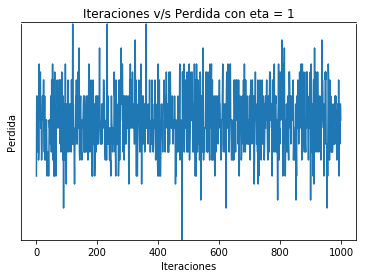

In [55]:
#se pone a prueba SGD usando el dataset de boston, normalizando las entradas x a valores mas entendibles.
#esto fue porque  los x eran del orden de 10^-12, tras la normalización quedaron del orden 10^-1.
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
beti=pendiente(np.array(X_train),np.array(y_train))
derivada(np.array(X_train),np.array(y_train),beta)
betas = gd(np.array(X_train),np.array(y_train),1,1000)
iteraciones=np.arange(1,1000)
errores=[]
for i in iteraciones:
    beta= gd(np.array(X_train),np.array(y_train),1,i)
    y_tongo= np.dot(X_train,np.transpose(beta) )
    errores.append(loss(y_tongo,y_train))

errorVar=max(errores)-min(errores)
plt.ylim((min(errores),max(errores)))
plt.plot(iteraciones,errores)
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Iteraciones v/s Perdida con eta = 1")
print(errorVar)
print(beti)
print(max(errores))
print(min(errores))

Como se ve en el gráfico, existe un comportamiento errático del error en función de la cantidad de iteraciones. Esto se debe principalmente ha que la diferencia entre el máximo y mínimo error es muy pequeña( $2.16 \cdot 10^{-12}$ aproximadamente). Esto último habla del poco intervalo que existe entre las perdidas entre las iteraciones. No hay mucho mas que hablar excepto de que se ve muy poca perdida entre las 400 y 600 iteraciones(un punto bajo). Se puede ver que la función de perdida converge en 529.62 aproximadamente, recien notandose diferencias en la onceava cifra decimal.

## F)

1.8189894035458565e-12


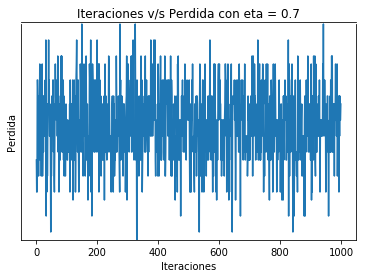

In [51]:
errores=[]
for i in iteraciones:
    beta= gd(np.array(X_train),np.array(y_train),0.7,i)
    y_tongo= np.dot(X_train,np.transpose(beta) )
    errores.append(loss(y_tongo,y_train))

errorVar=max(errores)-min(errores)
plt.ylim((min(errores),max(errores)))
plt.plot(iteraciones,errores)
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Iteraciones v/s Perdida con eta = 0.7")
print(errorVar)


Comparando este gráfico con el de eta = 1, se ve que el comportamiento sigue siendo erratico, pero ahora hay mas puntos bajos que antes, ademas, la diferencia entre la máxima y mínima perdida bajó a $1.8 \cdot 10^{-12}$.

2.0463630789890885e-12


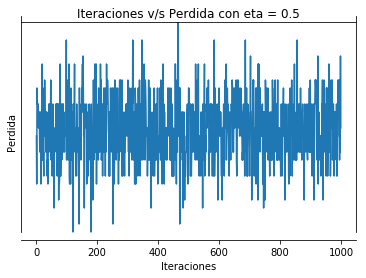

In [52]:
errores=[]
for i in iteraciones:
    beta= gd(np.array(X_train),np.array(y_train),0.5,i)
    y_tongo= np.dot(X_train,np.transpose(beta) )
    errores.append(loss(y_tongo,y_train))

errorVar=max(errores)-min(errores)
plt.ylim((min(errores),max(errores)))
plt.plot(iteraciones,errores)
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Iteraciones v/s Perdida con eta = 0.5")
print(errorVar)

Comparando este gráfico con el de eta = 1, se ve que el comportamiento sigue siendo erratico.La diferencia entre la máxima y mínima perdida bajó a $2.04 \cdot 10^{-12}$. Pero sigue siendo mayor a la de eta = 0.7.

2.0463630789890885e-12


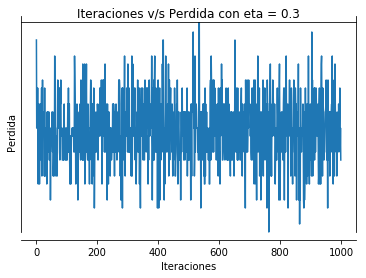

In [53]:
errores=[]
for i in iteraciones:
    beta= gd(np.array(X_train),np.array(y_train),0.3,i)
    y_tongo= np.dot(X_train,np.transpose(beta) )
    errores.append(loss(y_tongo,y_train))

errorVar=max(errores)-min(errores)
plt.ylim((min(errores),max(errores)))
plt.plot(iteraciones,errores)
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Iteraciones v/s Perdida con eta = 0.3")
print(errorVar)


Comparando este gráfico con el de eta = 1, se ve que el comportamiento sigue siendo erratico,de hecho, este gráfico es muy similar al que arrojó el eta = 0.5, ademas, la diferencia entre la máxima y mínima perdida bajó a $2.04 \cdot 10^{-12}$.

1.7053025658242404e-12


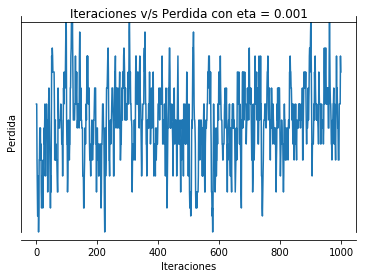

In [54]:
errores=[]
for i in iteraciones:
    beta= gd(np.array(X_train),np.array(y_train),0.001,i)
    y_tongo= np.dot(X_train,np.transpose(beta) )
    errores.append(loss(y_tongo,y_train))

errorVar=max(errores)-min(errores)
plt.ylim((min(errores),max(errores)))
plt.plot(iteraciones,errores)
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.title("Iteraciones v/s Perdida con eta = 0.001")
print(errorVar)

Comparando este gráfico con el de eta = 1, se ve que el comportamiento no es tan erratico, tiene una forma sinusoidal en la cantidad de iteraciones, ademas, la diferencia entre la máxima y mínima perdida bajó a $1.7 \cdot 10^{-12}$, incluso mas que en el gráfico de eta = 0.7. 

### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] http://statweb.stanford.edu/tibs/ElemStatLearn/datasets/  
[3] https://en.wikipedia.org/wiki/Stop words  
[4] https://en.wikipedia.org/wiki/Stemming  
[5] https://en.wikipedia.org/wiki/Lemmatisation  
[6] http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature extraction.text  
[7] http://www.nltk.org/  
[8] https://gluon.mxnet.io/chapter06_optimization/gd-sgd-scratch.html  
[9] https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76